In [1]:
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
#ALL 2002~2012년데이터
df_2002 = pd.read_excel("../데이터자료/ALL(IRS,CRS,Basis,KTB)_2002.xlsx")
df = pd.read_excel("../데이터자료/join_data.xlsx")
# 원래데이터의 필요한것만 가져오기
df_2012=df[['DateTime', '종가_ex','1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
 '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs', 
 '국고1년','국고3년','국고5년','국고10년','통안364일','통안2년', 
 '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스']]

# 2012년도 데이터와의 결합을 위한 컬럼명 통일
df_2002.columns=['DateTime','국고1년','국고3년','국고5년','국고10년','통안364일','통안2년',
                  '1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
                   '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
                   '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스']

df_all= pd.concat([df_2002,df_2012]).reset_index(drop='index')

In [3]:
#시간데이터 일치화
df_all["DateTime"] = pd.to_datetime(df_all["DateTime"], format="%Y-%m-%d")
df_all["DateTime"] = df_all["DateTime"].dt.strftime('%Y-%m-%d')


In [4]:
# 월말 영업일 데이터만 추출 시행

# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출

start_date = df_all['DateTime'].astype(str).iloc[0]
end_date = df_all['DateTime'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all = pd.date_range(start_date, end_date, freq='B').to_frame().rename(columns={0:'DateTime'}).reset_index(drop=True)
date_all = date_all['DateTime'].astype(str)

# # # # 데이터 병합 (영업일 date와 국체 병합)
df_all = pd.merge(date_all,df_all,how='left')

# # # 직전 값으로 NaN 값 채우기
df_all = df_all.fillna(method='ffill')

# 마지막 영업일 제외후 나머지 drop
df_KR = df_all.set_index(df_all['DateTime'])

# # # 각 월당 마지막 영업일 도출
month_end = pd.date_range('2002-08-01', '2022-08-01', freq='BM')
month_end = month_end.astype(str)

# 마지막 영업일 제외후 나머지 drop
df_all_BM = df_KR[df_KR['DateTime'].isin(month_end)].reset_index(drop=True)
df_all_BM = df_all_BM.set_index(df_all_BM['DateTime'])
df_all_BM = df_all_BM.drop(columns='DateTime')
df_all_BM.head()

,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,,
2002-08-30,4.96,5.21,5.43,5.89,6.46,4.71,4.82,5.04,5.47,6.08,...,-39.0,-42.0,-38.0,5.03,5.45,5.90,NaN,5.04,5.36,NaN
2002-09-30,4.94,5.06,5.22,5.57,6.11,4.62,4.68,4.78,5.09,5.69,...,-44.0,-48.0,-42.0,5.05,5.30,5.65,NaN,5.06,5.30,NaN
2002-10-31,5.01,5.07,5.16,5.40,5.77,4.62,4.66,4.73,4.92,5.29,...,-43.0,-48.0,-48.0,5.09,5.33,5.63,NaN,5.09,5.31,NaN
2002-11-29,4.93,5.11,5.31,5.55,5.86,4.65,4.70,4.79,4.99,5.23,...,-52.0,-56.0,-63.0,5.05,5.35,5.62,NaN,5.05,5.30,NaN
2002-12-31,4.86,4.91,5.04,5.31,5.60,4.46,4.49,4.55,4.71,4.97,...,-49.0,-60.0,-63.0,4.98,5.11,5.34,NaN,4.98,5.12,NaN


In [5]:
df_all = df_all.set_index(df_all['DateTime'])
df_all = df_all.drop(columns='DateTime')
df_all.head()

,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,,
2002-08-01,5.07,5.30,5.48,5.91,6.49,4.73,4.90,5.08,5.51,6.10,...,-40.0,-40.0,-39.0,5.16,5.48,5.97,NaN,5.16,5.50,NaN
2002-08-02,5.02,5.22,5.41,5.86,6.42,4.67,4.82,5.01,5.47,6.02,...,-40.0,-39.0,-40.0,5.09,5.39,5.89,NaN,5.09,5.41,NaN
2002-08-05,4.90,5.09,5.27,5.71,6.27,4.54,4.69,4.88,5.32,5.87,...,-39.0,-39.0,-40.0,5.00,5.26,5.68,NaN,5.00,5.27,NaN
2002-08-06,4.97,5.17,5.36,5.78,6.34,4.64,4.78,4.97,5.38,5.94,...,-39.0,-40.0,-40.0,5.05,5.32,5.73,NaN,5.05,5.32,NaN
2002-08-07,4.93,5.16,5.34,5.74,6.28,4.60,4.77,4.95,5.35,5.89,...,-39.0,-39.0,-39.0,5.03,5.30,5.68,NaN,5.03,5.32,NaN


In [6]:
# 전월대비 이자율 변화로 할 때 계산
# df_all_BM_return = df_all_BM - df_all_BM.shift(1)
## 전월대비 수익률 변화로 할 때 
df_all_BM_return = df_all_BM.pct_change()
df_all_BM_return = pd.DataFrame(df_all_BM_return) * 100
df_all_BM_return = df_all_BM_return.dropna()
df_all_BM_return = df_all_BM_return.drop("종가_ex",axis=1)
df_all_BM_return = pd.merge(df_all_BM_return, df_all["종가_ex"] , how='left', on='DateTime')

In [7]:
df_all_BM_return

,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-09-28,1.067616,1.086957,0.000000,0.000000,0.709220,1.071429,0.350877,0.731261,0.732601,1.086957,...,-1.907357,-0.555556,-1.360544,15.333333,6.849315,6.111111,3.225806,3.875969,-13.380282,1111.4
2012-10-31,-2.464789,-0.716846,-1.986755,-1.986755,-2.112676,-1.413428,-3.846154,-1.633394,-1.454545,-1.075269,...,0.277778,1.117318,13.793103,10.404624,-8.974359,-5.235602,-6.250000,-17.164179,-16.260163,1090.7
2012-11-30,2.527076,2.527076,2.364865,2.364865,2.517986,1.433692,1.454545,2.767528,2.952030,3.260870,...,-3.878116,-4.419890,-5.454545,-4.188482,7.042254,16.022099,17.777778,16.216216,17.475728,1082.9
2012-12-31,-2.112676,-0.704225,4.290429,4.290429,-2.456140,-0.353357,0.000000,0.718133,1.075269,1.754386,...,11.527378,10.404624,1.923077,2.732240,-25.000000,-17.142857,-14.150943,1.550388,2.479339,1070.6
2013-01-31,-1.079137,-2.127660,-1.898734,-1.898734,-1.079137,-2.127660,-0.716846,-0.713012,-0.709220,-1.379310,...,-6.718346,-6.282723,9.433962,4.255319,17.543860,12.643678,10.989011,-14.503817,-10.483871,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,20.666667,18.750000,15.853659,10.861423,16.339869,15.270936,13.262599,17.391304,18.901099,15.778252,...,44.927536,40.764331,28.654971,23.783784,-26.900585,-29.813665,-29.787234,-18.897638,-24.242424,1212.1
2022-04-29,8.839779,10.902256,11.228070,9.459459,6.179775,18.803419,15.925059,13.645224,12.199630,11.786372,...,6.000000,8.597285,10.000000,4.366812,49.600000,40.707965,28.282828,19.417476,45.333333,1255.9
2022-05-31,9.644670,2.372881,2.523659,2.469136,8.994709,2.517986,8.080808,4.459691,2.965404,3.624382,...,10.849057,5.833333,6.198347,4.184100,-17.112299,-12.578616,-7.874016,-6.504065,12.844037,1237.2


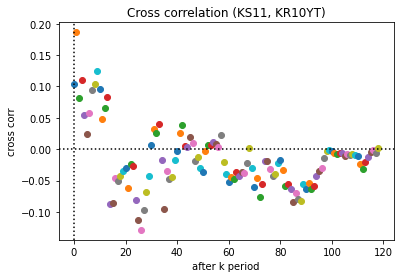

In [8]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['국고1년'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'1년국채와 환율 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

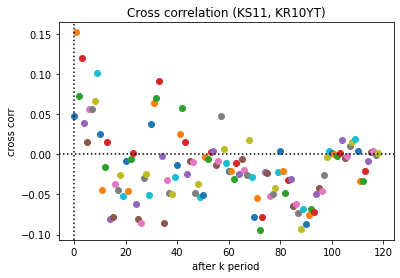

In [9]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['국고3년'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
       # print(f'3년국채와 환율 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

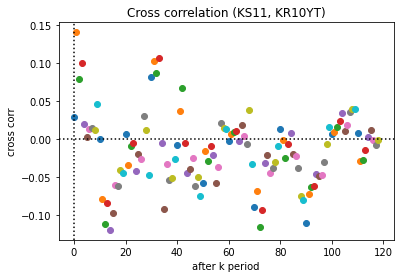

In [10]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['국고5년'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
        # print(f'5년국채와 환율 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

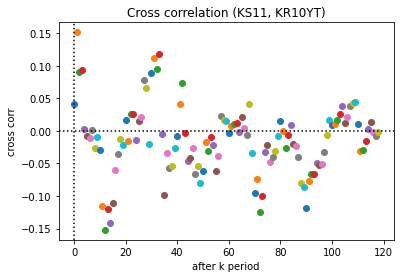

In [11]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['국고10년'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'10년국채와 환율 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

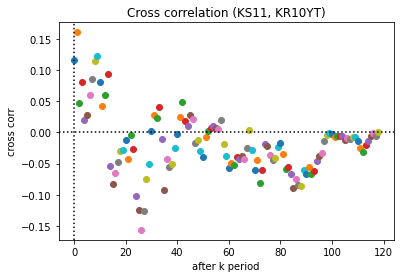

In [12]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['통안364일'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
   # print(f'364일 통안채와 환율 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1061: RuntimeWarning: invalid value encountered in subtract
  yo = y - y.mean()
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


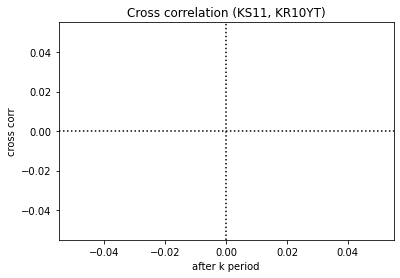

In [13]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['통안2년'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
   # print(f'통안2년채와 환율 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

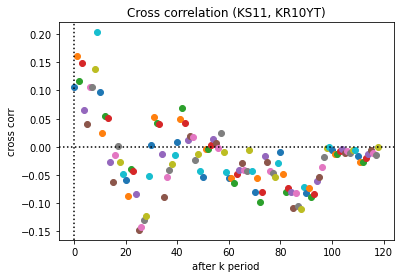

In [14]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['1Y_Mid_irs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'1년 irs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

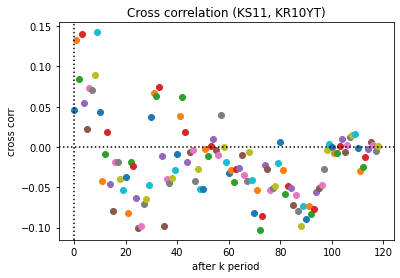

In [15]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['2Y_Mid_irs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'2년 irs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

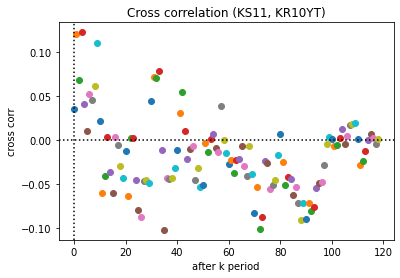

In [16]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['3Y_Mid_irs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'3년 irs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

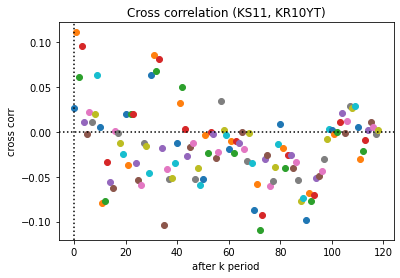

In [17]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['5Y_Mid_irs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'5년 irs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

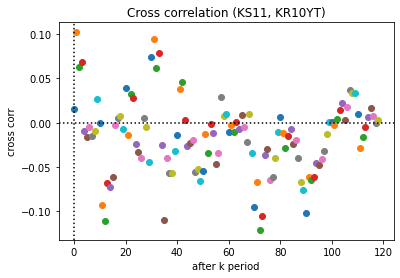

In [18]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['10Y_Mid_irs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'10년 irs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

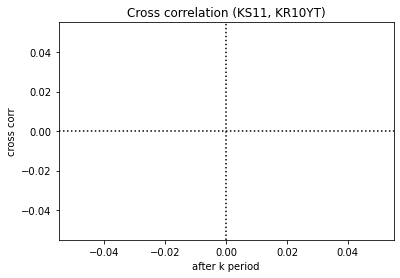

In [19]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['1Y_Mid_crs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'1년 crs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

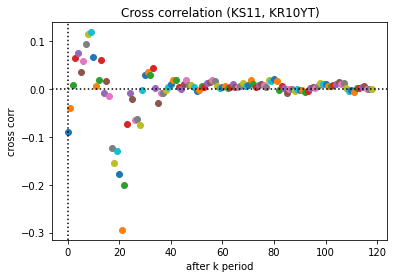

In [20]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['2Y_Mid_crs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'2년 crs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')
    
for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

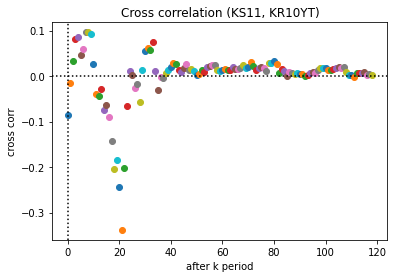

In [21]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['3Y_Mid_crs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'3년 crs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')
    
for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

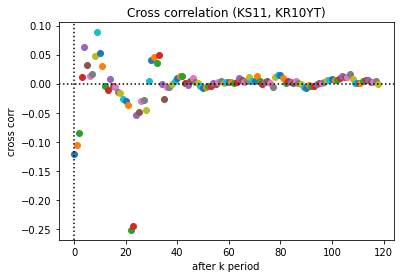

In [22]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['5Y_Mid_crs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'5년 crs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

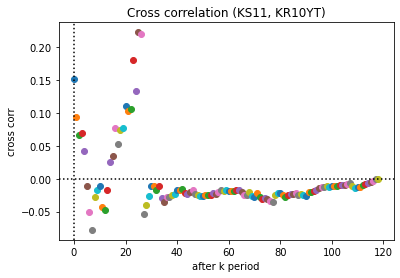

In [23]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['10Y_Mid_crs'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'10년 crs와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

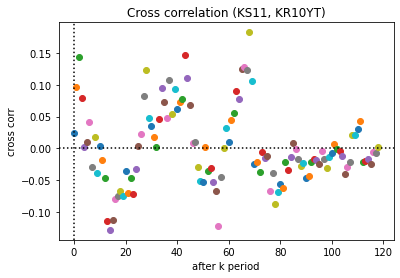

In [24]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['1Y_베이시스'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'1년 베이시스와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


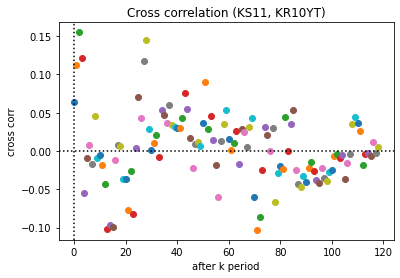

In [25]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['2Y_베이시스'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
   # print(f'2년 베이시스와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

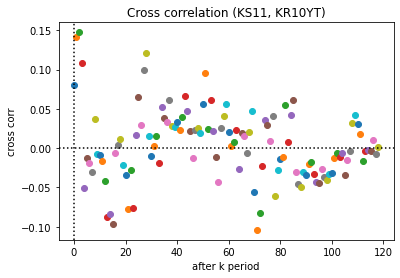

In [26]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['3Y_베이시스'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
   # print(f'3년 베이시스와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

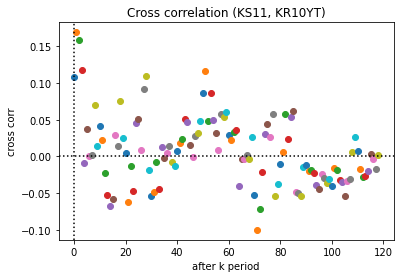

In [27]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['5Y_베이시스'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'5년 베이시스와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

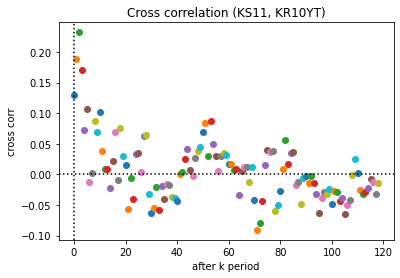

In [28]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_BM_return['10Y_베이시스'])
exchange_data = np.array(df_all_BM_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(119):
    # print(f'10년 베이시스와 환율과의 {i}개월 후 상관계수 값 : {cc[i] : .5f}')

for i in range(119):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()